
**Amazon Product Reviews Sentiment Analysis**


**Importing requried Module**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
nltk.download("punkt")
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**1. Reading text data**

In [ ]:
# Reading data using pandas
data = pd.read_table("/content/drive/MyDrive/Dataset/amazonreviews.tsv")
data.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


**2. EDA**

In [ ]:
# Finding Complet information of given data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  object
 1   review  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [ ]:
# Handling missing value
blank = []

for i, lb, mesg in data.itertuples():
  if(type(mesg) is str):
    if(mesg.isspace()):
      blank.append(i)
print("Dataset don't have any missing value",blank)

Dataset don't have any missing value []


In [ ]:
#Finding data is balance or unbalance
print("As we can see that is number of negative review are more compare to positive review dataset is unbalance")
data.label.value_counts()

As we can see that is number of negative review are more compare to positive review dataset is unbalance


neg    5097
pos    4903
Name: label, dtype: int64

In [ ]:
# Cleaning the text of review data
from nltk import tokenize

def Cleantext(text):

  #step 1
  # Convert the data into lower case and tokenize it
  token = nltk.word_tokenize(text.lower())

  # step 2
  # Filter the text keep only alphabet data
  atoken = [word for word in token if word.isalpha()]

  #step 3
  # removing all stopword from text data so that we can focus on import word in the text 
  stoken = [word for word in atoken if word not in stopwords.words("english")]

  #step 4 
  # Lemmatazation of all word: Converting word to it root form if they have same meaning else keep them as it is
  lemma = WordNetLemmatizer()
  ltoken = [lemma.lemmatize(word) for word in stoken]

  # Converting into string
  return " ".join(ltoken)



In [ ]:
data["review"] = data["review"].apply(Cleantext)
data

,label,review
0,pos,stuning even sound track beautiful paint sener...
1,pos,best soundtrack ever anything reading lot revi...
2,pos,amazing soundtrack favorite music time hand in...
3,pos,excellent soundtrack truly like soundtrack enj...
4,pos,remember pull jaw floor hearing played game kn...
...,...,...
9995,pos,revelation life small town america early thoug...
9996,pos,great biography interesting journalist biograp...
9997,neg,interesting subject poor presentation tell bor...
9998,neg,buy box looked used obviously new tried contac...


**3. Visualization**

Review with Positive Feedback


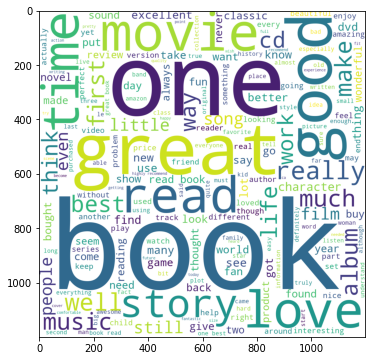

In [ ]:
# Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. 
#It is mainly used for analysing the data on social network.
from wordcloud import WordCloud

plt.figure(figsize = (6,6))

# Create object 
wc = WordCloud(width = 1200, height = 1200, background_color = "white",
                min_font_size = 10)

wc.generate(" ".join(data[data["label"] == "pos"]["review"]))

plt.imshow(wc)

print("Review with Positive Feedback")

Review with Negative Feedback


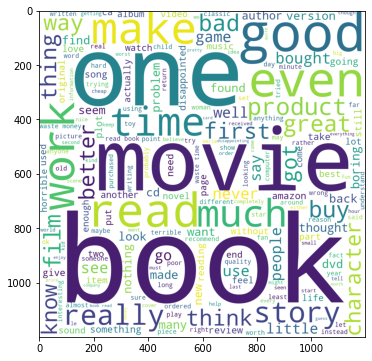

In [ ]:
plt.figure(figsize = (6,6))

wc.generate(" ".join(data[data["label"] == "neg"]["review"]))

plt.imshow(wc)

print("Review with Negative Feedback")

4. Vectorization
As we know machine learning model only understand numeric value so we have to convert text data into numeric data.

  CounterVectorization : Convert word of text into 0 or 1 vector or array

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
Vectorizer = CountVectorizer()

In [ ]:
X = Vectorizer.fit_transform(data["review"]).toarray()
X.ndim

2

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data["label"]= lb.fit_transform(data["label"])
Y = data["label"]

In [ ]:
data.head()

,label,review
0,1,stuning even sound track beautiful paint sener...
1,1,best soundtrack ever anything reading lot revi...
2,1,amazing soundtrack favorite music time hand in...
3,1,excellent soundtrack truly like soundtrack enj...
4,1,remember pull jaw floor hearing played game kn...


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42 )

**Model Building**

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,precision_score

GaussianNB = GaussianNB()

MultinomialNB =MultinomialNB()

BernoulliNB = BernoulliNB()

DecisionTreeClassifier = DecisionTreeClassifier()

RandomForestClassifier = RandomForestClassifier()

def Model_output(X):
  Model = X.fit(x_train,y_train)
  Y_pred = Model.predict(x_test)
  print(Model)
  print("Accuracy:",accuracy_score(y_test,Y_pred))
  print("Precision:",precision_score(y_test,Y_pred) )
  return


In [ ]:
Model_output(GaussianNB)

GaussianNB()
Accuracy: 0.617
Precision: 0.6750788643533123


In [ ]:
Model_output(MultinomialNB)

MultinomialNB()
Accuracy: 0.823
Precision: 0.8458181818181818


In [ ]:
Model_output(BernoulliNB)

BernoulliNB()
Accuracy: 0.8236666666666667
Precision: 0.8381831085876508


In [ ]:
Model_output(DecisionTreeClassifier)

DecisionTreeClassifier()
Accuracy: 0.7223333333333334
Precision: 0.7111255692908263


In [ ]:
Model_output(RandomForestClassifier)

RandomForestClassifier()
Accuracy: 0.8446666666666667
Precision: 0.8404825737265416


In [ ]:
# As we can see Multinormal Naive baise work good
model = MultinomialNB.fit(x_train,y_train)

def Output(txt):

  txt = Cleantext(txt)
  
  x_test =  Vectorizer.transform([txt]).toarray()
  
  Y_pred = model.predict(x_test)

  if Y_pred[0] == 1:
    print("Positive review")
  else:
    print("Negative review")


**Model Testing**

In [ ]:
text = "Bad product. I wanted it to return back but it is not returnable. Go for some other brands. I have been using spiriluna since long time but surely this is not spiriluna . Wastage of money. Some green leaf powder in the name of spirulina. Don't buy this product."

Output(text)

Negative review


In [ ]:
text ="Looks good for me. Have been using for the past 90 days. My immunity and sleeping time have improved 👍"
Output(text)

Positive review
